# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Modules

In [2]:
!pip install gmplot

     |████████████████████████████████| 164 kB 12.1 MB/s 


In [3]:
!pip install plotly

In [4]:
!pip install plotnine
!pip install haversine
!pip install geopy
!pip install arrow
!pip install geopandas

     |████████████████████████████████| 60 kB 4.8 MB/s 
     |████████████████████████████████| 994 kB 12.3 MB/s 
     |████████████████████████████████| 6.3 MB 84.1 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [5]:

!pip install pygeocoder

  Created wheel for pygeocoder: filename=pygeocoder-1.2.5-py3-none-any.whl size=8911 sha256=47f3aa49b0702b072ea39a557b2575bcfa38202adcf64678d3063429906cfede
  Stored in directory: /root/.cache/pip/wheels/fd/77/97/9c0c6cd57eed0daa759d2ad98217602333225936236862528c
Successfully built pygeocoder


In [6]:
!pip install gcmap

     |████████████████████████████████| 795 kB 15.0 MB/s 
  Created wheel for gcmap: filename=gcmap-0.0.6-py3-none-any.whl size=4730 sha256=66ade3d98c15366873e50afd5a408b84f76e0c50f3cd8ee808069b0138fdd2b9
  Stored in directory: /root/.cache/pip/wheels/c7/31/e3/ccbcddf1823f81f4cc9353b9d2c2a95c0071b5e2092eb53d87
Successfully built gcmap


# Imports

In [7]:
import numpy as np
import pandas as pd
import datetime
from geopy.distance import geodesic
from sklearn.neighbors import DistanceMetric
from math import radians
from haversine import Unit
import haversine as hs
import seaborn as sns
import math
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline
from pygeocoder import Geocoder
import folium
from IPython.display import display
from gcmap import GCMapper, Gradient

# Input Data

In [8]:
april_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202004-divvy-tripdata.csv')
may_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202005-divvy-tripdata.csv')
june_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202006-divvy-tripdata.csv')
july_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202007-divvy-tripdata.csv')
aug_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202008-divvy-tripdata.csv')
sept_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202009-divvy-tripdata.csv')
oct_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202010-divvy-tripdata.csv')
nov_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202011-divvy-tripdata.csv')
dec_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202012-divvy-tripdata.csv')
jan_21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202101-divvy-tripdata.csv')
feb_21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202102-divvy-tripdata.csv')
mar_21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202103-divvy-tripdata.csv')

# Combine input data files

In [9]:
tripdata_withDoubles = pd.concat([april_20,may_20,june_20,july_20,aug_20,sept_20,oct_20,nov_20,
                                  dec_20,jan_21,feb_21,mar_21],axis = 0) 

In [10]:
tripdata_withDoubles["start_station_id"] =  tripdata_withDoubles["start_station_id"].astype('str')
tripdata_withDoubles["end_station_id"] = tripdata_withDoubles["end_station_id"].astype('str')

In [11]:
all_tripdata = tripdata_withDoubles.copy()

# Raw Data Summary

In [12]:
all_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


In [13]:
all_tripdata.describe()

,start_lat,start_lng,end_lat,end_lng
count,3.489748e+06,3.489748e+06,3.485010e+06,3.485010e+06
mean,4.190417e+01,-8.764494e+01,4.190444e+01,-8.764522e+01
std,4.364222e-02,2.575969e-02,4.373705e-02,2.589123e-02
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01
25%,4.188224e+01,-8.765888e+01,4.188266e+01,-8.765917e+01
50%,4.190000e+01,-8.764170e+01,4.190068e+01,-8.764275e+01
75%,4.193000e+01,-8.762773e+01,4.193120e+01,-8.762775e+01
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01


In [14]:
all_tripdata.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member


# Data Cleaning

## Missing Data

In [15]:
all_tripdata.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id           0
end_station_name      143242
end_station_id             0
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [16]:
df_no_miss = all_tripdata[~all_tripdata['start_station_id'].isna()]
df_no_miss = all_tripdata[~all_tripdata['start_station_name'].isna()]
df_no_miss = all_tripdata[all_tripdata['end_station_id']!='nan']

In [17]:
df_no_miss.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_no_miss.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

## Check for invalid data

In [19]:
df_no_miss.ended_at = pd.to_datetime(df_no_miss['ended_at'], format = '%Y-%m-%d %H:%M:%S')
df_no_miss.started_at = pd.to_datetime(df_no_miss['started_at'], format = '%Y-%m-%d %H:%M:%S')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df_no_miss = df_no_miss[~(df_no_miss['ended_at']<=df_no_miss['started_at'])]

In [21]:
df_no_miss[(df_no_miss['ended_at']<=df_no_miss['started_at'])]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [22]:
df = df_no_miss.copy()

# Data Transformation

In [23]:
df['ride_length'] = df['ended_at'] - df['started_at']

In [24]:
df['ride_month'],df['ride_weekday'],df['ride_time'],df['ride_weekday_no'], df['ride_month_no'] = df.started_at.dt.month_name(), df.started_at.dt.day_name(), df.started_at.dt.hour, df.started_at.dt.dayofweek, df.started_at.dt.month 

In [25]:
def get_dist(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [26]:
df['distance'] = round(get_dist(df.start_lng,df.start_lat,df.end_lng,df.end_lat),2)

In [27]:
df['ride_length_min'] = round(df.ride_length.dt.total_seconds()/60, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3284416 entries, 0 to 228494
Data columns (total 21 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
 14  ride_month          object         
 15  ride_weekday        object         
 16  ride_time           int64          
 17  ride_weekday_no     int64          
 18  ride_month_no       int64          
 19  distance            fl

In [29]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_month,ride_weekday,ride_time,ride_weekday_no,ride_month_no,distance,ride_length_min
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,0 days 00:26:49,April,Sunday,17,6,4,3.98,26.8167
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,0 days 00:08:09,April,Friday,17,4,4,0.98,8.1500
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,0 days 00:14:23,April,Wednesday,17,2,4,2.99,14.3833
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,0 days 00:12:12,April,Tuesday,12,1,4,2.13,12.2000
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,0 days 00:52:55,April,Saturday,10,5,4,9.12,52.9167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228490,081549DEA616CA22,electric_bike,2021-03-14 01:59:38,2021-03-14 03:13:09,Larrabee St & Armitage Ave,TA1309000006,New St & Illinois St,TA1306000013,41.918129,-87.643749,41.890808,-87.618779,member,0 days 01:13:31,March,Sunday,1,6,3,3.67,73.5167
228491,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,0 days 02:23:51,March,Saturday,14,5,3,1.20,143.8500
228492,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:08:27,March,Tuesday,11,1,3,1.66,8.4500
228493,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,0 days 00:41:35,March,Tuesday,11,1,3,9.31,41.5833


In [ ]:
# start_geometry = [Point(xy) for xy in zip(df["start_lng"], df["start_lat"])]
# start_geometry[:3]

In [30]:
# crs = {'init':'epsg:4326'}
df['start_geometry'] = gpd.points_from_xy(df.start_lng, df.start_lat)

In [31]:
df['end_geometry'] = gpd.points_from_xy(df.end_lng, df.end_lat)

In [32]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_month,ride_weekday,ride_time,ride_weekday_no,ride_month_no,distance,ride_length_min,start_geometry,end_geometry
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:26:49,April,Sunday,17,6,4,3.98,26.8167,POINT (-87.66100 41.89640),POINT (-87.65860 41.93220)
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:08:09,April,Friday,17,4,4,0.98,8.1500,POINT (-87.71540 41.92440),POINT (-87.72380 41.93060)
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:23,April,Wednesday,17,2,4,2.99,14.3833,POINT (-87.61790 41.89450),POINT (-87.62300 41.86790)
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0 days 00:12:12,April,Tuesday,12,1,4,2.13,12.2000,POINT (-87.69750 41.90300),POINT (-87.67220 41.89920)
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0 days 00:52:55,April,Saturday,10,5,4,9.12,52.9167,POINT (-87.62620 41.89020),POINT (-87.65470 41.96950)


In [33]:
df.start_lat

0         41.896400
1         41.924400
2         41.894500
3         41.903000
4         41.890200
            ...    
228490    41.918129
228491    41.900960
228492    41.889177
228493    41.900960
228494    41.889177
Name: start_lat, Length: 3284416, dtype: float64

# Analysis

## Distance Calculating function

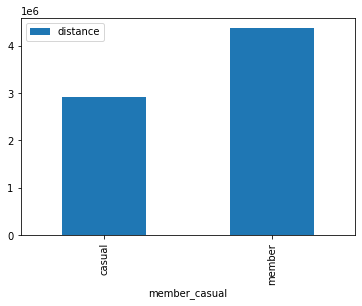

In [34]:
df['ride_time_sec'] = (df['ride_length'].dt.total_seconds())
df.loc[:,['member_casual','distance']].groupby(['member_casual']).sum().plot(kind = 'bar')
# [['distance']]

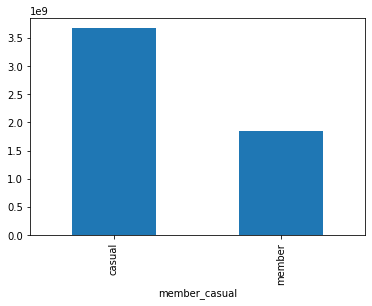

In [35]:
df.groupby('member_casual')['ride_time_sec'].sum().plot(kind = 'bar')

In [36]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'ride_month', 'ride_weekday',
       'ride_time', 'ride_weekday_no', 'ride_month_no', 'distance',
       'ride_length_min', 'start_geometry', 'end_geometry', 'ride_time_sec'],
      dtype='object')

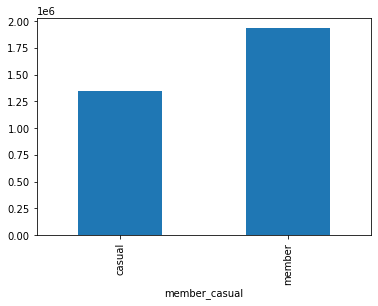

In [37]:
df.groupby('member_casual')['ride_id'].count().plot(kind = 'bar')

In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/final_rides.csv')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/final_rides.csv')

In [38]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_month,ride_weekday,ride_time,ride_weekday_no,ride_month_no,distance,ride_length_min,start_geometry,end_geometry,ride_time_sec
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,0 days 00:26:49,April,Sunday,17,6,4,3.98,26.8167,POINT (-87.66100 41.89640),POINT (-87.65860 41.93220),1609.0
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,0 days 00:08:09,April,Friday,17,4,4,0.98,8.1500,POINT (-87.71540 41.92440),POINT (-87.72380 41.93060),489.0
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,0 days 00:14:23,April,Wednesday,17,2,4,2.99,14.3833,POINT (-87.61790 41.89450),POINT (-87.62300 41.86790),863.0
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,0 days 00:12:12,April,Tuesday,12,1,4,2.13,12.2000,POINT (-87.69750 41.90300),POINT (-87.67220 41.89920),732.0
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,0 days 00:52:55,April,Saturday,10,5,4,9.12,52.9167,POINT (-87.62620 41.89020),POINT (-87.65470 41.96950),3175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228490,081549DEA616CA22,electric_bike,2021-03-14 01:59:38,2021-03-14 03:13:09,Larrabee St & Armitage Ave,TA1309000006,New St & Illinois St,TA1306000013,41.918129,-87.643749,41.890808,-87.618779,member,0 days 01:13:31,March,Sunday,1,6,3,3.67,73.5167,POINT (-87.64375 41.91813),POINT (-87.61878 41.89081),4411.0
228491,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,0 days 02:23:51,March,Saturday,14,5,3,1.20,143.8500,POINT (-87.62378 41.90096),POINT (-87.61862 41.89085),8631.0
228492,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:08:27,March,Tuesday,11,1,3,1.66,8.4500,POINT (-87.63851 41.88918),POINT (-87.61862 41.89085),507.0
228493,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,0 days 00:41:35,March,Tuesday,11,1,3,9.31,41.5833,POINT (-87.62378 41.90096),POINT (-87.66805 41.97800),2495.0


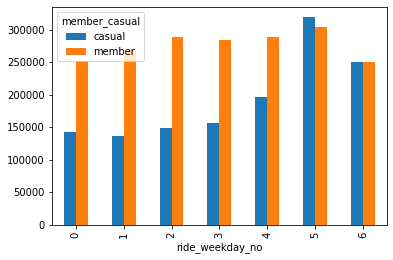

In [39]:
df.groupby(['ride_weekday_no','member_casual'])['ride_id'].count().unstack('member_casual').sort_values('ride_weekday_no').plot(kind = 'bar')     

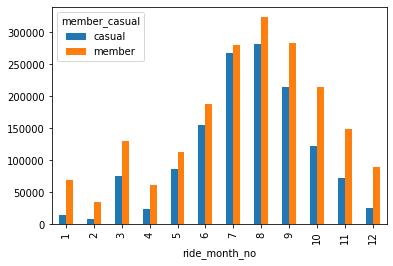

In [40]:
df.groupby(['ride_month_no','member_casual'])['ride_id'].count().unstack('member_casual').sort_values('ride_month_no').plot(kind = 'bar')     

In [ ]:
#df['ride_day'] = df.started_at.dt.weekday()

In [41]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_month,ride_weekday,ride_time,ride_weekday_no,ride_month_no,distance,ride_length_min,start_geometry,end_geometry,ride_time_sec
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:26:49,April,Sunday,17,6,4,3.98,26.8167,POINT (-87.66100 41.89640),POINT (-87.65860 41.93220),1609.0
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:08:09,April,Friday,17,4,4,0.98,8.1500,POINT (-87.71540 41.92440),POINT (-87.72380 41.93060),489.0
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:23,April,Wednesday,17,2,4,2.99,14.3833,POINT (-87.61790 41.89450),POINT (-87.62300 41.86790),863.0
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0 days 00:12:12,April,Tuesday,12,1,4,2.13,12.2000,POINT (-87.69750 41.90300),POINT (-87.67220 41.89920),732.0
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0 days 00:52:55,April,Saturday,10,5,4,9.12,52.9167,POINT (-87.62620 41.89020),POINT (-87.65470 41.96950),3175.0


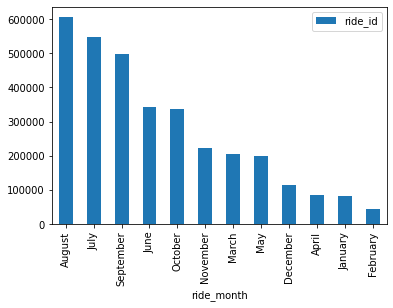

In [42]:
df.groupby('ride_month')['ride_id'].count().reset_index().sort_values('ride_id',ascending=False).plot(kind = 'bar', x = 'ride_month', y = 'ride_id')

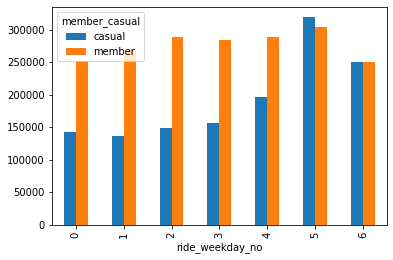

In [43]:
df.groupby(['ride_weekday_no','member_casual'])['ride_id'].count().unstack('member_casual').plot(kind='bar')

In [44]:
df['member_casual'].value_counts()

member    1936258
casual    1348158
Name: member_casual, dtype: int64

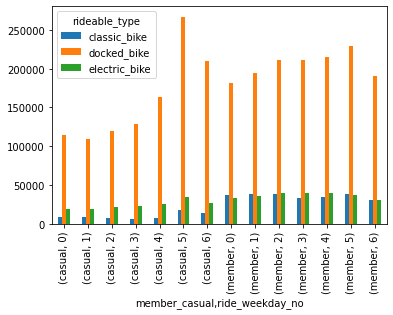

In [45]:
df.groupby(['member_casual','ride_weekday_no','rideable_type'])['ride_id'].count().unstack('rideable_type').plot(kind = 'bar')

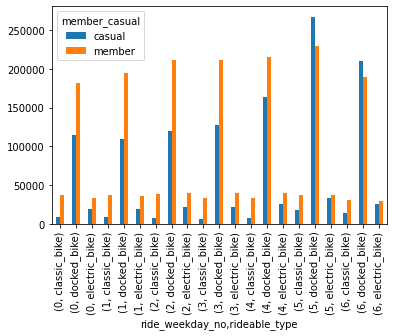

In [46]:
df.groupby(['member_casual','ride_weekday_no','rideable_type'])['rideable_type'].count().unstack('member_casual').plot(kind = 'bar')

In [47]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_month,ride_weekday,ride_time,ride_weekday_no,ride_month_no,distance,ride_length_min,start_geometry,end_geometry,ride_time_sec
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,0 days 00:26:49,April,Sunday,17,6,4,3.98,26.8167,POINT (-87.66100 41.89640),POINT (-87.65860 41.93220),1609.0
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,0 days 00:08:09,April,Friday,17,4,4,0.98,8.1500,POINT (-87.71540 41.92440),POINT (-87.72380 41.93060),489.0
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,0 days 00:14:23,April,Wednesday,17,2,4,2.99,14.3833,POINT (-87.61790 41.89450),POINT (-87.62300 41.86790),863.0
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,0 days 00:12:12,April,Tuesday,12,1,4,2.13,12.2000,POINT (-87.69750 41.90300),POINT (-87.67220 41.89920),732.0
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,0 days 00:52:55,April,Saturday,10,5,4,9.12,52.9167,POINT (-87.62620 41.89020),POINT (-87.65470 41.96950),3175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228490,081549DEA616CA22,electric_bike,2021-03-14 01:59:38,2021-03-14 03:13:09,Larrabee St & Armitage Ave,TA1309000006,New St & Illinois St,TA1306000013,41.918129,-87.643749,41.890808,-87.618779,member,0 days 01:13:31,March,Sunday,1,6,3,3.67,73.5167,POINT (-87.64375 41.91813),POINT (-87.61878 41.89081),4411.0
228491,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,0 days 02:23:51,March,Saturday,14,5,3,1.20,143.8500,POINT (-87.62378 41.90096),POINT (-87.61862 41.89085),8631.0
228492,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,0 days 00:08:27,March,Tuesday,11,1,3,1.66,8.4500,POINT (-87.63851 41.88918),POINT (-87.61862 41.89085),507.0
228493,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,0 days 00:41:35,March,Tuesday,11,1,3,9.31,41.5833,POINT (-87.62378 41.90096),POINT (-87.66805 41.97800),2495.0


In [48]:
def generate_map(map_location, map_style, start_lat_col, start_lng_col, start_color, end_lat_col, end_lng_col, end_color):
  folium_map = folium.Map(location=map_location,
                            zoom_start=11,
                            tiles=map_style)
  
  for index, row in df[:50].iterrows():
    folium.CircleMarker(location=(row[start_lat_col],
                                      row[start_lng_col]),
                            color=start_color,
                            radius=5,
                            weight=1,
                            fill=True).add_to(folium_map)

    folium.CircleMarker(location=(row[end_lat_col],
                                      row[end_lng_col]),
                            color=end_color,
                            radius=5,
                            weight=1,
                            fill=True).add_to(folium_map)

  return folium_map

  

In [49]:
generate_map([41.878100, -87.629800],"cartodbpositron","start_lat","start_lng",'#0A8A9F',"end_lat","end_lng",'#f68e56')

In [50]:
temp = df.groupby(['start_station_name','end_station_name'])['ride_id'].count().reset_index()

In [51]:
a = set(df['start_station_name'].unique())

In [52]:
b = set(df['end_station_name'].unique())

In [53]:
c = a.intersection(b)

In [54]:
c

{'2112 W Peterson Ave',
 '63rd St Beach',
 '900 W Harrison St',
 'Aberdeen St & Jackson Blvd',
 'Aberdeen St & Monroe St',
 'Aberdeen St & Randolph St',
 'Ada St & 113th St',
 'Ada St & Washington Blvd',
 'Adler Planetarium',
 'Albany Ave & 26th St',
 'Albany Ave & Bloomingdale Ave',
 'Albany Ave & Montrose Ave',
 'Archer (Damen) Ave & 37th St',
 'Artesian Ave & Hubbard St',
 'Ashland Ave & 13th St',
 'Ashland Ave & 50th St',
 'Ashland Ave & 63rd St',
 'Ashland Ave & 66th St',
 'Ashland Ave & 69th St',
 'Ashland Ave & 73rd St',
 'Ashland Ave & 74th St',
 'Ashland Ave & 78th St',
 'Ashland Ave & Archer Ave',
 'Ashland Ave & Augusta Blvd',
 'Ashland Ave & Belle Plaine Ave',
 'Ashland Ave & Blackhawk St',
 'Ashland Ave & Chicago Ave',
 'Ashland Ave & Division St',
 'Ashland Ave & Garfield Blvd',
 'Ashland Ave & Grace St',
 'Ashland Ave & Grand Ave',
 'Ashland Ave & Lake St',
 'Ashland Ave & McDowell Ave',
 'Ashland Ave & Pershing Rd',
 'Ashland Ave & Wellington Ave',
 'Ashland Ave & Wrigh

In [55]:
uq_st = pd.DataFrame(list(c))

In [56]:
uq_st.columns = ['end_station_name']

In [57]:
uq_st

,end_station_name
0,Columbus Dr & Randolph St
1,Laramie Ave & Kinzie St
2,Larrabee St & Oak St
3,Sheffield Ave & Webster Ave
4,Drake Ave & Fullerton Ave
...,...
697,Kimbark Ave & 53rd St
698,Clarendon Ave & Junior Ter
699,Eggleston Ave & 92nd St
700,Dodge Ave & Main St


In [ ]:
temp.sort_values(by=['ride_id'], ascending= False, inplace=True)

In [ ]:
p = uq_st.join(df, how='left')

ValueError: ignored

In [ ]:
df.set_index('state').to_dict()['name']

In [ ]:
p

,stations,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_month,ride_weekday,ride_time,ride_weekday_no,ride_month_no,distance,ride_length_min,start_geometry,end_geometry,ride_time_sec
0,Lincoln Ave & Diversey Pkwy,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,0 days 00:26:49,April,Sunday,17,6,4,3.98,26.8167,POINT (-87.66100 41.89640),POINT (-87.65860 41.93220),1609.0
1,Lincoln Ave & Diversey Pkwy,C757FBDF3FE9BED3,docked_bike,2020-04-12 13:42:17,2020-04-12 14:21:55,Clark St & Wrightwood Ave,340,Lincoln Ave & Diversey Pkwy,152.0,41.929500,-87.643100,41.932200,-87.658600,casual,0 days 00:39:38,April,Sunday,13,6,4,1.32,39.6333,POINT (-87.64310 41.92950),POINT (-87.65860 41.93220),2378.0
2,Lincoln Ave & Diversey Pkwy,792BBFC3DAEEC8C8,docked_bike,2020-04-18 16:28:45,2020-04-18 16:43:42,Wells St & Evergreen Ave,291,Lincoln Ave & Diversey Pkwy,152.0,41.906700,-87.634800,41.932200,-87.658600,member,0 days 00:14:57,April,Saturday,16,5,4,3.45,14.9500,POINT (-87.63480 41.90670),POINT (-87.65860 41.93220),897.0
3,Lincoln Ave & Diversey Pkwy,8D19BEDE89C2207A,docked_bike,2020-04-23 08:29:27,2020-04-23 08:34:21,Sheffield Ave & Fullerton Ave,67,Lincoln Ave & Diversey Pkwy,152.0,41.925600,-87.653700,41.932200,-87.658600,member,0 days 00:04:54,April,Thursday,8,3,4,0.84,4.9000,POINT (-87.65370 41.92560),POINT (-87.65860 41.93220),294.0
4,Lincoln Ave & Diversey Pkwy,09447FCA3E2F7B26,docked_bike,2020-04-04 11:28:16,2020-04-04 11:35:14,Ashland Ave & Wellington Ave,250,Lincoln Ave & Diversey Pkwy,152.0,41.936100,-87.669800,41.932200,-87.658600,member,0 days 00:06:58,April,Saturday,11,5,4,1.02,6.9667,POINT (-87.66980 41.93610),POINT (-87.65860 41.93220),418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284411,Halsted & 63rd - Kennedy-King Vaccination Site,0E12CE1F4170964D,classic_bike,2021-03-12 09:29:13,2021-03-12 10:11:54,Halsted & 63rd - Kennedy-King Vaccination Site,KA1503000055,Halsted & 63rd - Kennedy-King Vaccination Site,KA1503000055,41.779381,-87.644621,41.779381,-87.644621,member,0 days 00:42:41,March,Friday,9,4,3,0.00,42.6833,POINT (-87.64462 41.77938),POINT (-87.64462 41.77938),2561.0
3284412,Halsted & 63rd - Kennedy-King Vaccination Site,724A572137F3F251,classic_bike,2021-03-12 08:39:35,2021-03-12 09:17:14,Clinton St & 18th St,TA1307000044,Halsted & 63rd - Kennedy-King Vaccination Site,KA1503000055,41.857950,-87.640826,41.779381,-87.644621,member,0 days 00:37:39,March,Friday,8,4,3,8.74,37.6500,POINT (-87.64083 41.85795),POINT (-87.64462 41.77938),2259.0
3284413,Halsted & 63rd - Kennedy-King Vaccination Site,F9F1DF36F3F51B10,classic_bike,2021-03-18 16:58:17,2021-03-18 17:02:34,Stewart Ave & 63rd St,649,Halsted & 63rd - Kennedy-King Vaccination Site,KA1503000055,41.779835,-87.634774,41.779381,-87.644621,casual,0 days 00:04:17,March,Thursday,16,3,3,0.82,4.2833,POINT (-87.63477 41.77983),POINT (-87.64462 41.77938),257.0
3284414,Halsted & 63rd - Kennedy-King Vaccination Site,33652DA348B8FF9F,classic_bike,2021-03-21 17:59:25,2021-03-21 18:18:41,Woodlawn Ave & 75th St,569,Halsted & 63rd - Kennedy-King Vaccination Site,KA1503000055,41.759160,-87.595751,41.779381,-87.644621,member,0 days 00:19:16,March,Sunday,17,6,3,4.63,19.2667,POINT (-87.59575 41.75916),POINT (-87.64462 41.77938),1156.0


In [ ]:
uq_st

,0
0,Western Ave & Winnebago Ave
1,Halsted St & 21st St
2,Dearborn St & Erie St
3,Kedzie Ave & Lake St
4,Bissell St & Armitage Ave
...,...
697,DuSable Museum
698,Canal St & Jackson Blvd
699,Racine Ave & Belmont Ave
700,Kingsbury St & Kinzie St


In [ ]:
a = temp[temp['ride_id'] > 499]

start_station_name    object
end_station_name      object
ride_id                int64
dtype: object